# Analyse MNIST with SKLEARN
In this notebook we analyse mnist dataset with sklearn models. The goal of this notebook is to see how we can start analysing images using machine learning. 

The mnist dataset can be read about [here](http://yann.lecun.com/exdb/mnist/)


### Import modules
Read more about the dataset [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html)

In [5]:
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(y_train.shape)

(70000, 784)
(46900, 784)
(46900,)


### Train the model
Start with MLPClassifier and change some hyperparameters. Read more about MLPClassifier api [Here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

If training is slow, change the number of features we're using for training.


In [9]:
from sklearn.neural_network  import MLPClassifier
activation = 'relu'
solver='adam'
hidden_layer_sizes=(50, )
learning_rate_init=0.001
clf = MLPClassifier(activation=activation, hidden_layer_sizes=hidden_layer_sizes,learning_rate_init=learning_rate_init)

clf.fit(X_train[:1000, :], y_train[:1000])
# clf.fit(X_train, y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [10]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

train_accuracy = accuracy_score(train_pred, y_train)
test_accuracy = accuracy_score(test_pred, y_test)
print('Training accuracy %f ' % train_accuracy)
print('Test accuracy %f ' % test_accuracy)

Training accuracy 0.767910 
Test accuracy 0.759567 


### Lets plot images together with their predictions

Below is 8


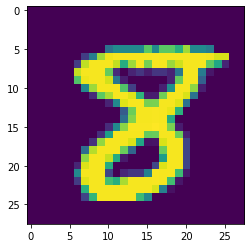

Below is 4


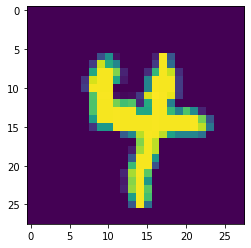

Below is 8


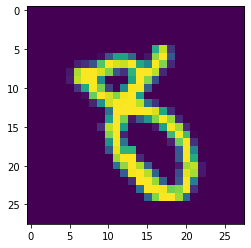

Below is 7


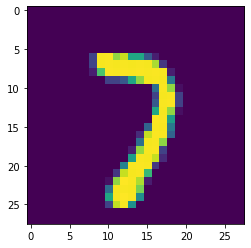

Below is 7


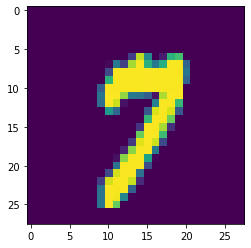

Below is 0


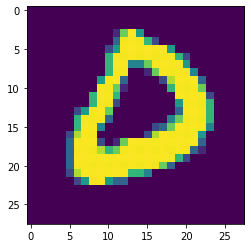

Below is 6


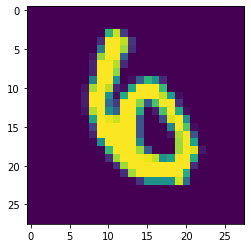

Below is 2


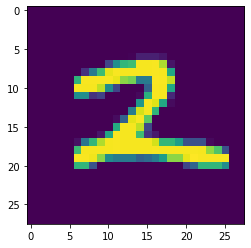

Below is 7


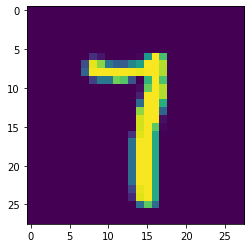

Below is 4


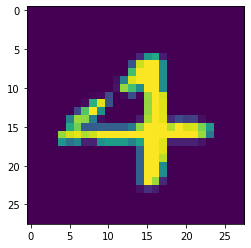

In [12]:
import numpy as np
import matplotlib.pyplot as plt
num_samples = 10
for i in range(num_samples):
    flat_image = X_test[i, :]
    tmp_pred = test_pred[i]
    
    print('Below is %s' % str(tmp_pred))
    image = np.reshape(flat_image, (28, 28))
    plt.imshow(image)
    plt.show()